In [1]:
from sklearn.datasets import load_digits
from sklearn import ensemble, cross_validation, learning_curve, metrics, tree
import numpy as np
import pandas as pd

In [43]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
digits = load_digits()

In [3]:
X = digits.data
y = digits.target

In [13]:
classifier = tree.DecisionTreeClassifier()
scores = cross_validation.cross_val_score(classifier, X, y, cv=10)
print(scores.mean())

0.828694317164


In [14]:
def write_array_to_file(answers, filename):
    with open(filename, "w") as fout:
        fout.write(" ".join([str(num) for num in answers]))
        
def write_one_to_file(answer, filename):
    with open(filename, "w") as fout:
        fout.write(answer)

In [15]:
write_one_to_file(str(scores.mean()), "4_1.txt")

In [17]:
begging = ensemble.BaggingClassifier(n_estimators=100)
score = cross_validation.cross_val_score(begging, X, y, cv=10).mean()
print(score)
write_one_to_file(str(score), "4_2.txt")

0.928751810932


In [36]:
beg = ensemble.BaggingClassifier(n_estimators=100, max_features = 8)
score = cross_validation.cross_val_score(beg, X, y, cv=10).mean()
print(score)
write_one_to_file(str(score), "4_3.txt")

0.935466581733


In [38]:
beg = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_features = 8), n_estimators=100)
score = cross_validation.cross_val_score(beg, X, y, cv=10).mean()
print(score)
write_one_to_file(str(score), "4_4.txt")

0.954400868763


In [51]:
?ensemble.RandomForestClassifier

In [50]:
rf_classifier_low_depth = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)

In [40]:
train_sizes, train_scores, test_scores = learning_curve.learning_curve(rf_classifier_low_depth, X, y, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=3, scoring='accuracy')

In [41]:
print train_sizes
print train_scores.mean(axis = 1)
print test_scores.mean(axis = 1)

[ 119  358  597  836 1075]
[ 0.95238095  0.89571695  0.87493021  0.87320574  0.83813953]
[ 0.6426317   0.74119521  0.7689446   0.79291802  0.79686082]


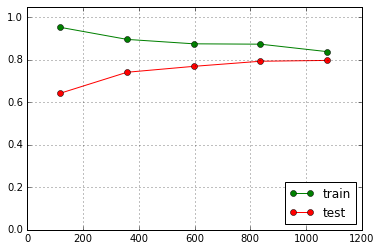

In [44]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

In [129]:
?ensemble.RandomForestClassifier

In [142]:
rf_classifier_big_depth = ensemble.RandomForestClassifier(n_estimators = 20, max_features = 10, max_depth = 100, random_state = 1)

In [143]:
train_sizes, train_scores, test_scores = learning_curve.learning_curve(rf_classifier_big_depth, X, y, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=3, scoring='accuracy')

In [144]:
print train_sizes
print train_scores.mean(axis = 1)
print test_scores.mean(axis = 1)

[ 119  358  597  836 1075]
[ 1.          1.          0.99944165  1.          1.        ]
[ 0.74016012  0.83756568  0.89707115  0.90763889  0.91876592]


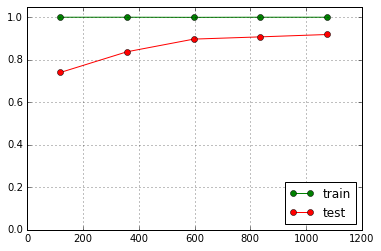

In [145]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')